# Рабочий вариант без разделения

In [ ]:
import numpy as np

from keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SimpleRNN

# Загрузка текста из файла
with open('/content/povesti-belkina.txt', 'r', encoding='utf-8') as file:
    text = file.read()

# Токенизация текста
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])  # Обучаем токенизатор на нашем тексте

# Преобразуем текст в последовательности токенов
sequences = tokenizer.texts_to_sequences([text])[0]

# Определяем максимальную длину последовательностей
max_length = 100  # Вы можете изменить это значение в зависимости от ваших данных

# Создаем входные данные и метки для обучения
X = []
y = []

for i in range(max_length, len(sequences)):
    X.append(sequences[i-max_length:i])  # Входные данные
    y.append(sequences[i])  # Метки

# Преобразуем X и y в массивы NumPy
X = np.array(X)
y = np.array(y)

# Паддинг последовательностей (если необходимо)
X = pad_sequences(X, maxlen=max_length)

# Преобразуем метки в категориальный формат (если необходимо)
from keras.utils import to_categorical
y = to_categorical(y, num_classes=len(tokenizer.word_index) + 1)

# Теперь X и y готовы для обучения модели RNN
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (19552, 100)
Shape of y: (19552, 6918)


In [ ]:
X

array([[ 352,  536,  201, ...,   13, 1092, 1093],
       [ 536,  201,  184, ..., 1092, 1093, 1094],
       [ 201,  184,  296, ..., 1093, 1094, 2071],
       ...,
       [6880,  957,  295, ...,  887,    6,  528],
       [ 957,  295,  946, ...,    6,  528,   54],
       [ 295,  946,   83, ...,  528,   54, 1498]], dtype=int32)

In [ ]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
tokenizer.word_index

{'и': 1,
 'в': 2,
 'не': 3,
 '\xa0–': 4,
 'он': 5,
 'с': 6,
 'на': 7,
 'я': 8,
 'что': 9,
 'его': 10,
 'ее': 11,
 'как': 12,
 'к': 13,
 'но': 14,
 'она': 15,
 'было': 16,
 'а': 17,
 'по': 18,
 'за': 19,
 'мне': 20,
 'то': 21,
 'у': 22,
 'ему': 23,
 'меня': 24,
 '–': 25,
 '»': 26,
 'от': 27,
 'из': 28,
 'был': 29,
 'все': 30,
 'же': 31,
 'мы': 32,
 'ли': 33,
 'о': 34,
 'была': 35,
 'уже': 36,
 'их': 37,
 'ни': 38,
 'лиза': 39,
 'были': 40,
 'это': 41,
 'ты': 42,
 'до': 43,
 'так': 44,
 'алексей': 45,
 'да': 46,
 'него': 47,
 'сильвио': 48,
 'еще': 49,
 'свою': 50,
 'сказал': 51,
 'ей': 52,
 'бы': 53,
 'вы': 54,
 'со': 55,
 'день': 56,
 'или': 57,
 'во': 58,
 'ним': 59,
 'отвечал': 60,
 'они': 61,
 'смотритель': 62,
 'время': 63,
 'себе': 64,
 'своей': 65,
 'сказала': 66,
 'наконец': 67,
 'им': 68,
 'своего': 69,
 'никогда': 70,
 'мог': 71,
 'между': 72,
 'мой': 73,
 'перед': 74,
 'владимир': 75,
 'тут': 76,
 'более': 77,
 'где': 78,
 'только': 79,
 'спросил': 80,
 'стал': 81,
 'мною': 8

In [ ]:
# Создание модели RNN
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_length))
model.add(SimpleRNN(128, return_sequences=False))
model.add(Dense(len(tokenizer.word_index) + 1, activation='softmax'))

# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Обучение модели
model.fit(X, y, epochs=10, batch_size=64)

Epoch 1/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 34s 101ms/step - accuracy: 0.0344 - loss: 8.1733
Epoch 2/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 31s 102ms/step - accuracy: 0.0426 - loss: 7.4168
Epoch 3/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 38s 92ms/step - accuracy: 0.0445 - loss: 7.0457
Epoch 4/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 31s 102ms/step - accuracy: 0.0589 - loss: 6.5073
Epoch 5/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 43s 108ms/step - accuracy: 0.0786 - loss: 5.9409
Epoch 6/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 34s 112ms/step - accuracy: 0.1141 - loss: 5.4000
Epoch 7/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 39s 106ms/step - accuracy: 0.1895 - loss: 4.8060
Epoch 8/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 39s 101ms/step - accuracy: 0.2920 - loss: 4.3075
Epoch 9/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 42s 105ms/step - accuracy: 0.3884 - loss: 3.8151
Epoch 10/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 40s 102ms/step - accuracy: 0.4748 - loss: 3.3279


In [ ]:
print(model.summary())

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)           │ (None, 120, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 16)                  │           7,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,012 (58.64 KB)

 Trainable params: 7,505 (29.32 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,507 (29.33 KB)

None


In [ ]:
# model -  обученная модель
# tokenizer - токенизатор, использованный для обучения

# Функция для предсказания следующего слова
def predict_next_word(model, tokenizer, input_text, max_length=100):
    # Токенизация входного текста
    sequence = tokenizer.texts_to_sequences([input_text])[0]

    # Проверяем, достаточно ли длинная последовательность
    if len(sequence) > max_length:
        sequence = sequence[-max_length:]  # Оставляем только последние max_length токенов

    # Паддинг последовательности
    padded_sequence = pad_sequences([sequence], maxlen=max_length)

    # Предсказание
    predicted = model.predict(padded_sequence, verbose=0)

    # Получаем индекс слова с максимальной вероятностью
    predicted_index = np.argmax(predicted, axis=-1)[0]

    # Получаем слово по индексу
    for word, index in tokenizer.word_index.items():
        if index == predicted_index:
            return word

# Пример использования
input_text = "Василий кот"
predicted_word = predict_next_word(model, tokenizer, input_text)
print(f"Следующее слово: {predicted_word}")

Следующее слово: угодно


### Визуализация точности и потерь модели при обучении

Epoch 1/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 37s 121ms/step - accuracy: 0.5439 - loss: 2.8441
Epoch 2/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 37s 110ms/step - accuracy: 0.6018 - loss: 2.4604
Epoch 3/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 33s 107ms/step - accuracy: 0.6470 - loss: 2.1376
Epoch 4/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 41s 107ms/step - accuracy: 0.6936 - loss: 1.8514
Epoch 5/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 41s 106ms/step - accuracy: 0.7367 - loss: 1.5920
Epoch 6/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 42s 109ms/step - accuracy: 0.7691 - loss: 1.3831
Epoch 7/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 39s 103ms/step - accuracy: 0.8025 - loss: 1.2066
Epoch 8/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 40s 101ms/step - accuracy: 0.8283 - loss: 1.0534
Epoch 9/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 32s 105ms/step - accuracy: 0.8581 - loss: 0.8989
Epoch 10/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 40s 101ms/step - accuracy: 0.8846 - loss: 0.7752


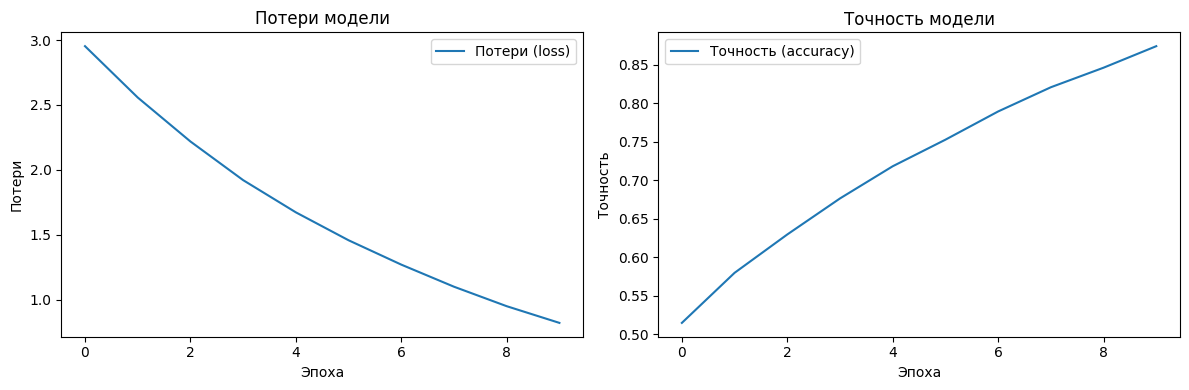

In [ ]:
import matplotlib.pyplot as plt

# Обучение модели и сохранение истории
history = model.fit(X, y, epochs=10, batch_size=64)

# Визуализация потерь и точности
# График потерь
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Потери (loss)')
plt.title('Потери модели')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend()

# График точности
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Точность (accuracy)')
plt.title('Точность модели')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()

plt.tight_layout()
plt.show()

# Подход с разделением данных

In [ ]:
from typing import Tuple
from sklearn.model_selection import train_test_split

# ШАГ 1: функция для подготовки данных для обучения рекуррентной нейросети
def load_and_prepare_data_2(file_path: str, max_length: int = 100) -> Tuple[np.ndarray, np.ndarray, Tokenizer]:
    """
    Загружаем текст из файла, токенизируем его и подготавливаем входные данные и метки для обучения модели RNN.

    :param file_path: Путь к файлу с текстом для обучения.
    :param max_length: Максимальная длина последовательностей.
    :return: Кортеж из массивов NumPy (X, y, tokenizer).
    """
    # Загрузка текста из файла
    with open(file_path, 'r', encoding='utf-8') as file:
        text_2 = file.read()

    # Токенизация текста
    tokenizer_2 = Tokenizer()
    tokenizer_2.fit_on_texts([text_2])  # Обучаем токенизатор на нашем тексте

    # Преобразуем текст в последовательности токенов
    sequences_2 = tokenizer_2.texts_to_sequences([text_2])[0]

    # Создаем пустые списки для входных данных (X) и меток (y) для обучения модели
    X_2 = []  # Список для хранения входных данных
    y_2 = []  # Список для хранения меток

    # Проходим по всем элементам последовательностей, начиная с индекса max_length
    for i_2 in range(max_length, len(sequences_2)):
        # Добавляем в список X подмассив из последовательностей длиной max_length, заканчивающийся на текущем элементе
        X_2.append(sequences_2[i_2 - max_length:i_2])  # Входные данные: последние max_length элементов перед текущим
        # Добавляем в список y текущий элемент последовательности как метку
        y_2.append(sequences_2[i_2])  # Метка: текущий элемент последовательности

    # Преобразуем X и y в массивы NumPy
    X_2 = np.array(X_2)
    y_2 = np.array(y_2)

    # Паддинг последовательностей при необходимости
    X_2 = pad_sequences(X_2, maxlen=max_length)

    # Преобразуем метки в категориальный формат (позволяет модели лучше обучаться) при необходимости
    y_2 = to_categorical(y_2, num_classes=len(tokenizer_2.word_index) + 1)

    return X_2, y_2, tokenizer_2

# ШАГ 2: Загрузка и подготовка данных

X_2, y_2, tokenizer_2 = load_and_prepare_data_2('/content/povesti-belkina.txt')

# Теперь X и y готовы для обучения модели RNN
print("Shape of X_2:", X.shape)
print("Shape of y_2:", y.shape)

# ШАГ 3: Разделение данных на train, validation и test наборы
# Разделяем данные на 80% для обучения, 10% для валидации и 10% для тестирования
X_train, X_temp, y_train, y_temp = train_test_split(X_2, y_2, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)
print("Test shape:", X_test.shape)

Shape of X_2: (19552, 100)
Shape of y_2: (19552, 6918)
Train shape: (15641, 100)
Validation shape: (1955, 100)
Test shape: (1956, 100)


In [ ]:
num_features = X_train.shape[-1]  # Получаем последний элемент из кортежа shape
print("Количество признаков:", num_features)

Количество признаков: 100


In [ ]:
sampling_rate = 6
sequence_length = 100
delay = sampling_rate * (sequence_length + 24 - 1)
batch_size = 256

In [ ]:
num_train_samples = int(0.5 * len(X_2))
num_val_samples = int(0.25 * len(X_2))
num_test_samples = len(X_2) - num_train_samples - num_val_samples
print("num_train_samples:", num_train_samples)
print("num_val_samples:", num_val_samples)
print("num_test_samples:", num_test_samples)

num_train_samples: 9776
num_val_samples: 4888
num_test_samples: 4888


In [ ]:
sampling_rate = 6
sequence_length = 120
delay = sampling_rate * (sequence_length + 24 - 1)
batch_size = 256

train_dataset = keras.utils.timeseries_dataset_from_array(
 X_2[:-delay],
 targets=y_2[delay:],
 sampling_rate=sampling_rate,
 sequence_length=sequence_length,
 shuffle=True,
 batch_size=batch_size,
 start_index=0,
 end_index=num_train_samples)

val_dataset = keras.utils.timeseries_dataset_from_array(
 X_2[:-delay],
 targets=y_2[delay:],
 sampling_rate=sampling_rate,
 sequence_length=sequence_length,
 shuffle=True,
 batch_size=batch_size,
 start_index=num_train_samples,
 end_index=num_train_samples + num_val_samples)

test_dataset = keras.utils.timeseries_dataset_from_array(
 X_2[:-delay],
 targets=y_2[delay:],
 sampling_rate=sampling_rate,
 sequence_length=sequence_length,
 shuffle=True,
 batch_size=batch_size,
 start_index=num_train_samples + num_val_samples)

In [ ]:
for samples, targets in train_dataset:
  print("samples shape:", samples.shape)
  print("targets shape:", targets.shape)
  break


samples shape: (256, 120, 100)
targets shape: (256, 6918)


Шолле использует оценку - среднеквадратичную ошибку (mean squared error,
MSE)

In [ ]:
inputs = keras.Input(shape=(sequence_length, X_2.shape[-1]))
x = layers.LSTM(16)(inputs)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)
callbacks = [
 keras.callbacks.ModelCheckpoint("jena_lstm.keras",
 save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])


In [ ]:
history = model.fit(train_dataset,
 epochs=10,
 validation_data=val_dataset,
 callbacks=callbacks)
model = keras.models.load_model("jena_lstm.keras")
print(f"Тестовая MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 13s 267ms/step - loss: 0.3808 - mae: 0.4923 - val_loss: 0.2710 - val_mae: 0.4099
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 12s 314ms/step - loss: 0.2359 - mae: 0.3867 - val_loss: 0.1826 - val_mae: 0.3380
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 23s 396ms/step - loss: 0.1468 - mae: 0.3030 - val_loss: 0.1264 - val_mae: 0.2797
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 12s 325ms/step - loss: 0.1014 - mae: 0.2496 - val_loss: 0.0667 - val_mae: 0.1943
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 253ms/step - loss: 0.0512 - mae: 0.1652 - val_loss: 0.0356 - val_mae: 0.1299
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 11s 251ms/step - loss: 0.0256 - mae: 0.1067 - val_loss: 0.0209 - val_mae: 0.0936
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 11s 286ms/step - loss: 0.0131 - mae: 0.0701 - val_loss: 0.0108 - val_mae: 0.0600
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 12s 326ms/step - loss: 0.0072 - mae: 0.0478 - val_loss: 0.0074 - val_mae: 0.0457
Epoch 9/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 251ms/s

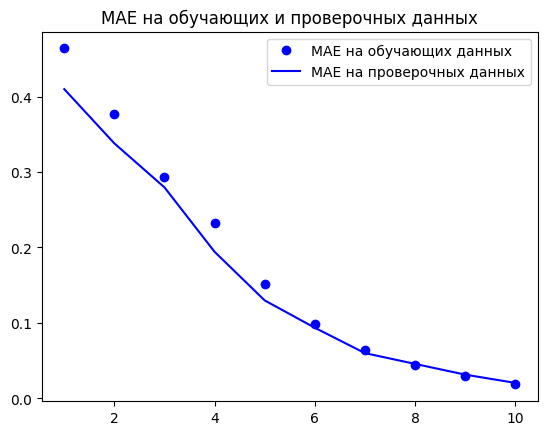

In [ ]:
import matplotlib.pyplot as plt
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="MAE на обучающих данных")
plt.plot(epochs, val_loss, "b", label="MAE на проверочных данных")
plt.title("MAE на обучающих и проверочных данных")
plt.legend()
plt.show()

In [ ]:
print(model_2.summary())

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 120, 1)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 16)                  │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,169 (4.57 KB)

 Trainable params: 1,169 (4.57 KB)

 Non-trainable params: 0 (0.00 B)

None
